In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten
from keras.layers import Dropout, Dense
from keras import backend


from sklearn.datasets import load_files
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import pandas as pd
import os

Using TensorFlow backend.


In [2]:
def show_image(np_array):
    %matplotlib inline
    plt.figure()
    plt.imshow(np_array, cmap='gray')

# Loading the images

    x_eq - arrays of pixes of eq's
    x_an - arrays of pixes of an's

In [3]:
eq_files = []
for root, _, files in os.walk(os.path.normpath('./pics/data')):
    for file in files:
        eq_files.append(os.path.join(root, file))

eq_files = sorted(eq_files, key=lambda b: int(b[b.find("_")+1:b.find(".")]))

In [4]:
an_files = []
for root, _, files in os.walk(os.path.normpath('./pics/labels')):
    for file in files:
        an_files.append(os.path.join(root, file))

an_files = sorted(an_files, key=lambda b: int(b[b.find("_")+1:b.find(".")]))

border - is 60% of data

In [5]:
border = int(len(eq_files)*0.6)
border

12

# Data preprocessing

In [6]:
x_eq = np.array([np.array(load_img(fname, grayscale=True)) for fname in  eq_files])
x_an = np.array([np.array(load_img(fname, grayscale=True)) for fname in  an_files])

In [7]:
train_x_eq = x_eq[:border]
test_x_eq = x_eq[border:]
train_x_an = x_an[:border]
test_x_an = x_an[border:]


data_labels - array with eq and 1/0 if correspondent answer is correct/wrong

In [10]:
with open("./pics/info.csv") as datafile_labels:
    data_labels = pd.read_csv(datafile_labels)
data_labels

,Unnamed: 0,EquationNumber,IsCorrect
0,0,./pics/data/eq_0.jpeg,0
1,1,./pics/data/eq_1.jpeg,1
2,2,./pics/data/eq_2.jpeg,0
3,3,./pics/data/eq_3.jpeg,0
4,4,./pics/data/eq_4.jpeg,0
5,5,./pics/data/eq_5.jpeg,0
6,6,./pics/data/eq_6.jpeg,1
7,7,./pics/data/eq_7.jpeg,0
8,8,./pics/data/eq_8.jpeg,0
9,9,./pics/data/eq_9.jpeg,1


In [11]:
# for i in range(sorted(data_labels["EquationNumber"], key=lambda b: int(b[b.find("_")+1:b.find(".j")]))):
#     print(i)
# #     print(data_labels["IsCorrect"][i])
for index, eq in enumerate(sorted(data_labels["EquationNumber"], key=lambda b: int(b[b.find("_")+1:b.find(".j")]))):
    print(data_labels["IsCorrect"][index])

0
1
0
0
0
0
1
0
0
1
0
1
0
1
0
0
1
1
0
0


In [12]:
labels = [data_labels["IsCorrect"][index] for index, _ in enumerate(sorted(data_labels["EquationNumber"], key=lambda b: int(b[b.find("_")+1:b.find(".j")])))]

In [13]:
train_y = labels[:border]
test_y = labels[border:]

In [14]:
# for i, j in enumerate(train_x_eq[20]):
#     print(i,j, "h")
train_x_an[1].shape

(28, 165)

In [ ]:
# n = 4  # 1 - 3,6   
for n in range(21, 30):
    print("labe", train_y[n])
    res_eq = []
    for j, row in enumerate(train_x_eq[n]):
        for i, cell in enumerate(row):
            if train_x_eq[n][j][i] == train_x_an[n][j][i]:
#                 print("CELL: ", cell, "LABEL: ", train_y[n], "COORDINATES: ", j,i )

                res_eq.append((j, i))
    res_an = []
    for j, row in enumerate(train_x_an[n]):
        for i, cell in enumerate(row):
            if cell == train_x_an[n][j][i]:
                res_an.append((j, i))
                
    

    print(res_eq, res_an)
# show_image(train_x_an[21])`

0
[(2, 36), (2, 37), (2, 54), (2, 55), (2, 56), (2, 57), (2, 128), (2, 129), (2, 131), (2, 147), (2, 148), (2, 152), (2, 153), (3, 36), (3, 38), (3, 51), (3, 52), (3, 53), (3, 54), (3, 57), (3, 58), (3, 59), (3, 60), (3, 127), (3, 129), (3, 131), (3, 132), (3, 133), (3, 134), (3, 135), (3, 146), (3, 148), (3, 150), (3, 151), (3, 154), (3, 155), (4, 34), (4, 36), (4, 37), (4, 50), (4, 52), (4, 53), (4, 54), (4, 57), (4, 58), (4, 59), (4, 61), (4, 124), (4, 125), (4, 126), (4, 127), (4, 128), (4, 130), (4, 133), (4, 135), (4, 136), (4, 145), (4, 147), (4, 149), (4, 151), (4, 152), (4, 153), (4, 154), (4, 156), (5, 34), (5, 36), (5, 38), (5, 50), (5, 51), (5, 60), (5, 61), (5, 124), (5, 126), (5, 133), (5, 134), (5, 136), (5, 145), (5, 146), (5, 154), (5, 155), (6, 33), (6, 34), (6, 35), (6, 37), (6, 50), (6, 51), (6, 52), (6, 59), (6, 60), (6, 61), (6, 124), (6, 135), (6, 143), (6, 144), (6, 155), (6, 156), (6, 157), (7, 32), (7, 33), (7, 35), (7, 36), (7, 38), (7, 49), (7, 50), (7, 61),

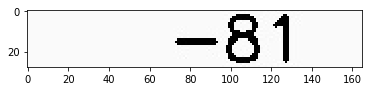

In [38]:
# n = 4  # 1 - 3,6   
for n in range(1, 100):
    print(train_y[n])
    res_eq = []
    for j, row in enumerate(train_x_eq[n]):
        for i, cell in enumerate(row):

            if cell == train_y[n]:
#                 print("CELL: ", cell, "LABEL: ", train_y[n], "COORDINATES: ", j,i )

                res_eq.append((j, i))
    res_an = []
    for j, row in enumerate(train_x_an[n]):
        for i, cell in enumerate(row):
            if cell == train_y[n]:
                res_an.append((j, i))
                
    

    print(res_eq, res_an)
# show_image(train_x_an[21])

Just to check if everything is OK with a random equation

0

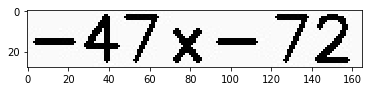

In [15]:
show_image(train_x_eq[2])
train_y[2]

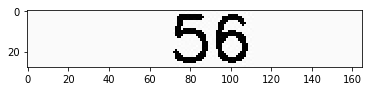

In [16]:
show_image(train_x_an[2])

In [17]:
print(train_x_an.shape)
print(train_x_eq.shape)

(12, 28, 165)
(12, 28, 165)


In [18]:
train_x = []
for i in range(len(train_x_eq)):
    train_x.append([train_x_eq[i], train_x_an[i]])
train_x = np.array(train_x)

In [19]:
test_x = []
for i in range(len(test_x_eq)):
    test_x.append([test_x_eq[i], test_x_an[i]])
test_x = np.array(test_x)

In [20]:
train_y = np_utils.to_categorical(train_y, 2)
test_y = np_utils.to_categorical(test_y, 2)

In [21]:
if backend.image_data_format() != 'channels_first':
    train_x = train_x.reshape(train_x.shape[0], 28, 165, 2)
    test_x = test_x.reshape(test_x.shape[0], 28, 165, 2)
    input_shape = (28, 165, 2)

train_x = train_x.astype('float32')
train_x = train_x/255

test_x = test_x.astype('float32')
test_x = test_x/255

In [22]:
batch_size = 32
epochs = 20

In [23]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_first"))
model.add(Convolution2D(64, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_first"))
model.add(Dropout(0.25))
model.add(Convolution2D(128, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_first"))
model.add(Convolution2D(256, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_first"))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(84,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [24]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
print(train_x.shape,  train_y.shape)
print(test_x.shape, test_y.shape)
print(len(test_y))

(12, 28, 165, 2) (12, 2)
(8, 28, 165, 2) (8, 2)
8


In [26]:
model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(test_x, test_y))

Train on 12 samples, validate on 8 samples
Epoch 1/20
12/12 [==============================] - 1s - loss: 0.7162 - acc: 0.4167 - val_loss: 1.6677 - val_acc: 0.6250
Epoch 2/20
12/12 [==============================] - 0s - loss: 2.0039 - acc: 0.6667 - val_loss: 0.6698 - val_acc: 0.6250
Epoch 3/20
12/12 [==============================] - 0s - loss: 0.6527 - acc: 0.6667 - val_loss: 0.7695 - val_acc: 0.3750
Epoch 4/20
12/12 [==============================] - 0s - loss: 0.8161 - acc: 0.3333 - val_loss: 0.7340 - val_acc: 0.3750
Epoch 5/20
12/12 [==============================] - 0s - loss: 0.7592 - acc: 0.3333 - val_loss: 0.7021 - val_acc: 0.3750
Epoch 6/20
12/12 [==============================] - 0s - loss: 0.6998 - acc: 0.3333 - val_loss: 0.6860 - val_acc: 0.6250
Epoch 7/20
12/12 [==============================] - 0s - loss: 0.6761 - acc: 0.7500 - val_loss: 0.6748 - val_acc: 0.6250
Epoch 8/20
12/12 [==============================] - 0s - loss: 0.6557 - acc: 0.6667 - val_loss: 0.6652 - val_a

In [27]:
loss,accuracy = model.evaluate(test_x, test_y, verbose=1)
print("Loss ",loss)
print("Accuracy ", accuracy)

8/8 [==============================] - 0s
Loss  0.654865980148
Accuracy  0.625


In [28]:
loss,accuracy = model.evaluate(train_x, train_y, verbose=1)
print("Loss ",loss)
print("Accuracy ", accuracy)

12/12 [==============================] - 0s
Loss  0.570886552334
Accuracy  0.666666686535
